# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [65]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']
male_stat = pd.DataFrame(male_df.describe())
female_stat = pd.DataFrame(female_df.describe())
female_df.head()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007


,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

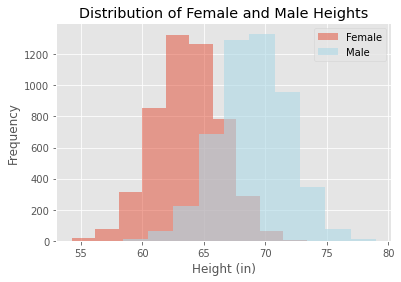

In [56]:
fig,ax = plt.subplots()

ax = female_df['Height'].hist(alpha=.5,bins=10,label = 'Female')
ax = male_df['Height'].hist(alpha=.6,color='lightblue',bins=10, label = 'Male')
ax.set_title('Distribution of Female and Male Heights')
ax.set_xlabel('Height (in)')
ax.set_ylabel('Frequency')
ax.legend();

The heights for males are centrally located at a taller height than the heights for females. This makes sense, because males are taller than females.


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

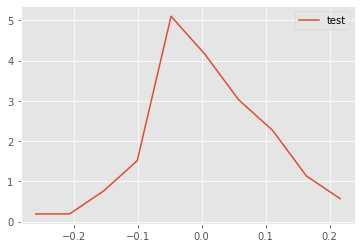

In [49]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1]) #x value is half the distance between the front edge of two histogram bins
        pdfy[k] = n[k]#y value is the height of the existing bin

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

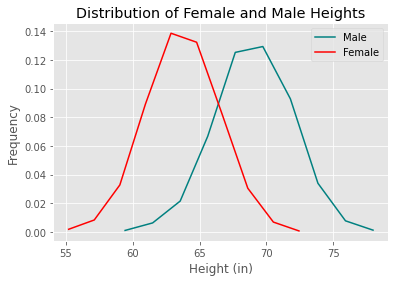

In [80]:
fig,ax = plt.subplots()
fem = np.random.normal(female_df['Height'].mean(),female_df['Height'].std())
x,y=density(male_df.Height)
ax.plot(x,y,color='teal',label='Male')
# ax = female_df['Height'].hist(alpha=.5,bins=10,color='red')
# ax = male_df['Height'].hist(alpha=.5,color='teal',bins=10)
x,y=density(female_df.Height)
ax.plot(x,y,color='red',label='Female')
ax.set_title('Distribution of Female and Male Heights')
ax.set_xlabel('Height (in)')
ax.set_ylabel('Frequency')
ax.legend();

## Repeat the above exercise for male and female weights

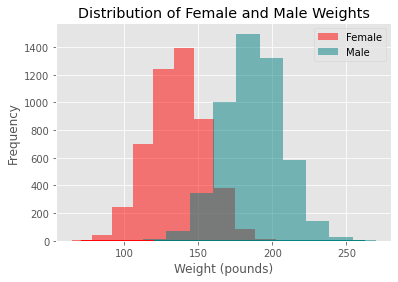

In [83]:
fig,ax = plt.subplots()
ax = female_df['Weight'].hist(alpha=.5,bins=10,label = 'Female',color='red')
ax = male_df['Weight'].hist(alpha=.5,color='teal',bins=10, label = 'Male')
x,y=density(female_df.Weight)
ax.plot(x,y,color='red')
x,y=density(male_df.Weight)
ax.plot(x,y,color='teal')
ax.set_title('Distribution of Female and Male Weights')
ax.set_xlabel('Weight (pounds)')
ax.set_ylabel('Frequency')
ax.legend();

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

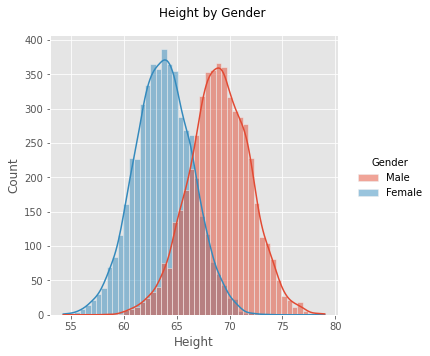

In [142]:
import seaborn as sns
import scipy as stats
p = sns.displot(data,x="Height",hue="Gender",kde=True)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle("Height by Gender");

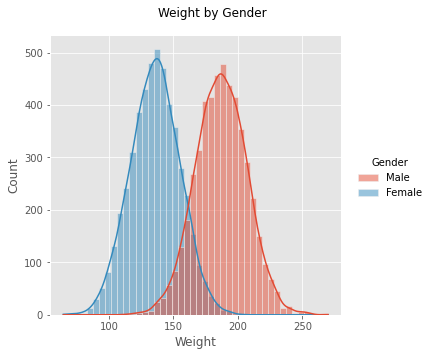

In [145]:
w = sns.displot(data,x="Weight",hue="Gender",kde=True)
w.fig.subplots_adjust(top=0.9)
w.fig.suptitle("Weight by Gender");

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.